<a href="https://colab.research.google.com/github/hauduong05/ML_basics/blob/main/feature_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

x = np.random.randn(1000, 1) * 5 + 5

def plot_hist(x, bins=10, xlim=(-1,1), varname='x'):
  sns.histplot(x, bins=bins, kde='True')
  plt.title('Histogram of {}'.format(varname))
  plt.xlim(xlim)
  plt.legend([varname])

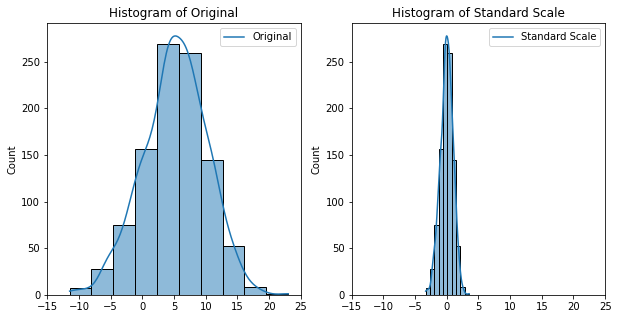

In [10]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1 = plot_hist(x, varname='Original', xlim=(-15, 25))

ax2 = fig.add_subplot(1, 2, 2)
ax2 = plot_hist(x_scale, varname='Standard Scale', xlim=(-15,25))

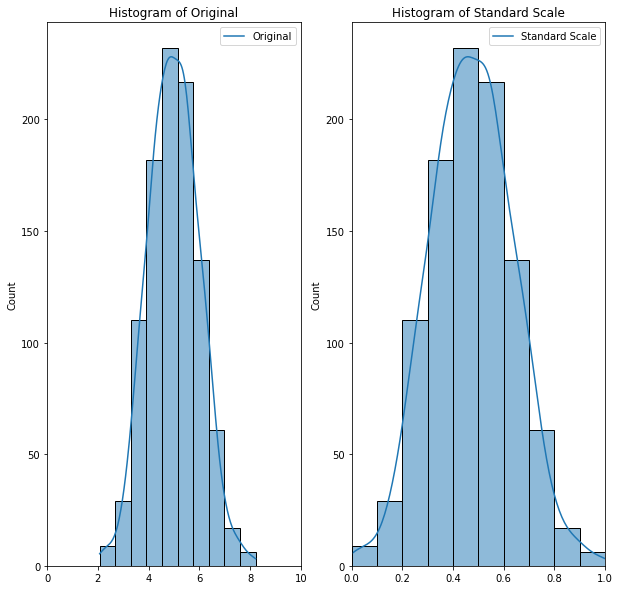

In [28]:
x = np.random.randn(1000, 1) + 5

scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1 = plot_hist(x, varname='Original', xlim=(0, 10))

ax2 = fig.add_subplot(1, 2, 2)
ax2 = plot_hist(x_scale, varname='Standard Scale', xlim=(0, 1))

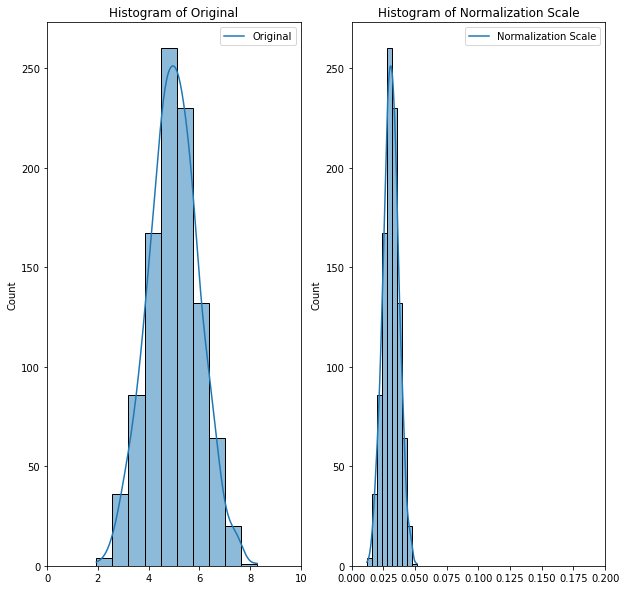

In [32]:
x = np.random.randn(1000, 1) + 5

x_scale = x / np.linalg.norm(x)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1 = plot_hist(x, varname='Original', xlim=(0, 10))

ax2 = fig.add_subplot(1, 2, 2)
ax2 = plot_hist(x_scale, varname='Normalization Scale', xlim=(0, 0.2))

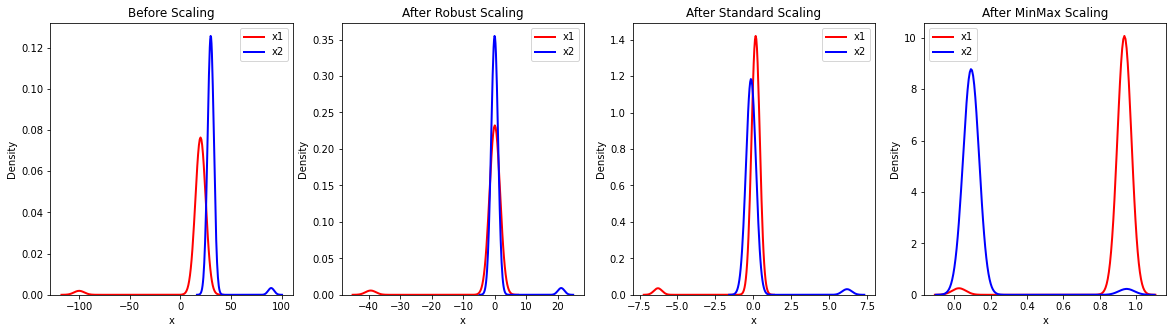

In [27]:
x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(-100, 2, 25)]),
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(90, 2, 25)]),
})

scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))

ax1.set_title('Before Scaling')
ax1.set_xlabel('x')
sns.kdeplot(x['x1'], ax=ax1, color='r', linewidth=2)
sns.kdeplot(x['x2'], ax=ax1, color='b', linewidth=2)
ax1.legend(['x1', 'x2'])

ax2.set_title('After Robust Scaling')
ax2.set_xlabel('x')
sns.kdeplot(robust_df['x1'], ax=ax2, color='r', linewidth=2)
sns.kdeplot(robust_df['x2'], ax=ax2, color='b', linewidth=2)
ax2.legend(['x1', 'x2'])

ax3.set_title('After Standard Scaling')
ax3.set_xlabel('x')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='r', linewidth=2)
sns.kdeplot(standard_df['x2'], ax = ax3, color ='b' , linewidth=2)
ax3.legend(['x1', 'x2'])

ax4.set_title('After MinMax Scaling')
ax4.set_xlabel('x')
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='r', linewidth=2)
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='b', linewidth=2)
ax4.legend(['x1', 'x2'])

plt.show()